# How to infer gyrochronal age precision using vertical actions

I want to infer the precision on gyrochronal age as a function of vertical action. I need to marginalise over the radial velocities as I don't have these for the majority of the stars.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
%matplotlib inline

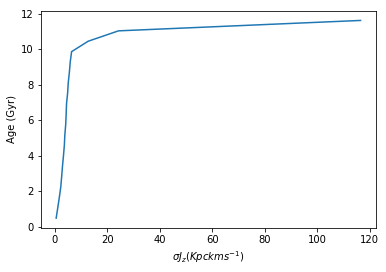

In [44]:
dw = pd.read_csv("data/dwarf.txt")
pl.plot(dw.jz.values, dw.age.values)
pl.ylabel("Age (Gyr)")
pl.xlabel("$\sigma J_z (Kpc kms^{-1})$")

This is kind of a broken power law:

Line break at sigma Jz = 6.434944591 (ln sigma Jz = 1.86174323044 )


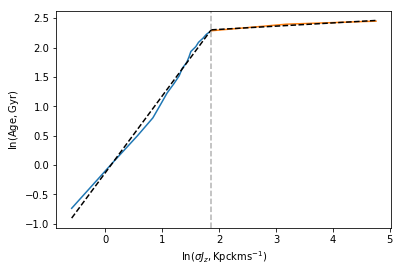

In [62]:
c = -3
a1, j1 = dw.age.values[:c], dw.jz.values[:c]
a2, j2 = dw.age.values[c-1:], dw.jz.values[c-1:]

pl.plot(np.log(j1), np.log(a1))
pl.plot(np.log(j2), np.log(a2))
pl.ylabel("$\ln (\mathrm{Age, Gyr})$")
pl.xlabel("$\ln(\sigma J_z, \mathrm{Kpc kms}^{-1})$")

def fit_line(x, y, yerr):
    AT = np.vstack((x, np.ones(len(x))))
    ATA = np.dot(AT, AT.T)
    return np.linalg.solve(ATA, np.dot(AT, y))
    
m1, c1 = fit_line(np.log(j1), np.log(a1), np.ones_like(a1)*.1)
pl.plot(np.log(j1), m1*np.log(j1) + c1, "k", ls="--")
m2, c2 = fit_line(np.log(j2), np.log(a2), np.ones_like(a2)*.1)
pl.plot(np.log(j2), m2*np.log(j2) + c2, "k", ls="--")
pl.axvline(np.log(dw.jz.values[c-1]), color=".7", ls="--")

print("Line break at sigma Jz =", dw.jz.values[c-1], "(ln sigma Jz =", np.log(dw.jz.values[c-1]), ")")